## Logistic Regression pareto-optimal

In [1]:
model = "LR"
dataset = "census"
sensitive_param = "sex"
import pandas as pd
import numpy as np


## Logistic Regression pareto-optimal using 10x max iteration

In [23]:
# Run this for the 10x max_iter
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}.csv")
standardized = False
num_iter = "1x"

In [8]:
# Run this for masking
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}_exhaust.csv")
standardized = False
num_iter = "feature masking search"

In [3]:
# Run this for the 10x max_iter
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}_x10.csv")
standardized = False
num_iter = "10x"

In [10]:
# Run this for the 100x max_iter
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}_x100.csv")
num_iter = "100x"
standardized = False

In [26]:
# Run this for the 100x max_iter
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}_x100_SS.csv")
num_iter = "100x"
standardized = True

         score       AOD
0     0.812062  0.020201
256   0.811940  0.020082
419   0.809237  0.009288
427   0.809729  0.011818
1539  0.756541  0.000000
4101  0.811571  0.015590
4131  0.809114  0.008395
4204  0.812185  0.027003
4229  0.811817  0.016969
4237  0.810588  0.014318
4387  0.809483  0.009299
4515  0.808869  0.007445
5256  0.797322  0.001876
5260  0.796217  0.001763
5504  0.796708  0.001852
6306  0.799902  0.003889
6455  0.794865  0.001548
6471  0.816116  0.074351
6542  0.802113  0.004828
6551  0.794006  0.001092
6622  0.789706  0.000454
7510  0.788847  0.000120
7575  0.793391  0.000907


Text(0.5, 1.0, 'Pareto optimal frontier points_feature masking search_standardized=False')

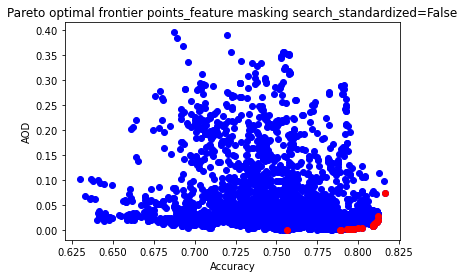

In [9]:
# Taken from https://newbedev.com/fast-calculation-of-pareto-front-in-python
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient
from matplotlib.pyplot import scatter, xlabel, ylabel, title
scatter(df["score"],df["AOD"], color='blue')


df_masking = df.copy()
df_masking["score"] = -df_masking["score"] # we want to find maximium for score


mask = is_pareto_efficient(df_masking[["score","AOD"]].to_numpy(), True)
scatter(df["score"][mask],df["AOD"][mask], color='red')
print(f"{df[['score', 'AOD']][mask]}")
xlabel("Accuracy")
ylabel("AOD")
title(f"Pareto optimal frontier points_{num_iter}_standardized={standardized}")

In [26]:
df.iloc[0]

solver                                                       liblinear
penalty                                                             l2
dual                                                              True
tol                                                           0.304348
C                                                            65.265856
fit_intercept                                                     True
intercept_scaling                                             7.778986
max_iteration                                                      105
multi_class                                                        ovr
l1_ratio                                                           NaN
class_weight                                                       NaN
random_state                                                      2019
verbose                                                              0
warm_start                                                       False
n_jobs